# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Data loading and Understanding


In [2]:
data = pd.read_csv('medical_insurance.csv') 
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
data.shape

(2772, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
data.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [7]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data cleaning and Preprocessing

In [9]:
duplicates=data.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
2767     True
2768     True
2769     True
2770     True
2771     True
Length: 2772, dtype: bool


In [10]:
df= data.drop_duplicates().copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
le= LabelEncoder()
df['sex']= le.fit_transform(df['sex'])
df['smoker']= le.fit_transform(df['smoker'])
df['region']= le.fit_transform(df['region'])
df
# sex 0: Female ,1:Male
# smoker: 1 :yes, 0: No
#region: 1: northwest, 2: southeast, 3:southwest, 0: northeast

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [12]:
df.corr()   #correlation of region with the label is -0.01, this indicates a very weak relation between them

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


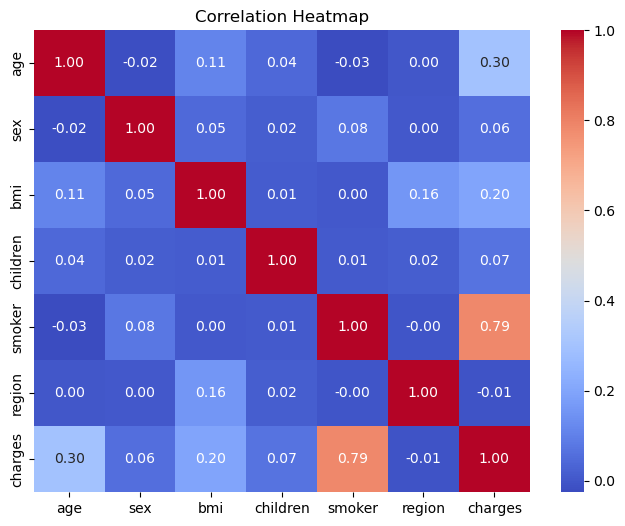

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Visualization (EDA)

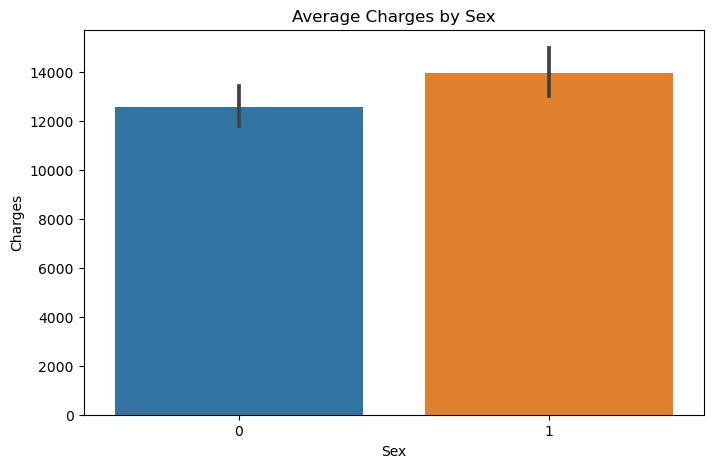

In [14]:
# Sex vs Charges
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='charges', data=df)
plt.title('Average Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

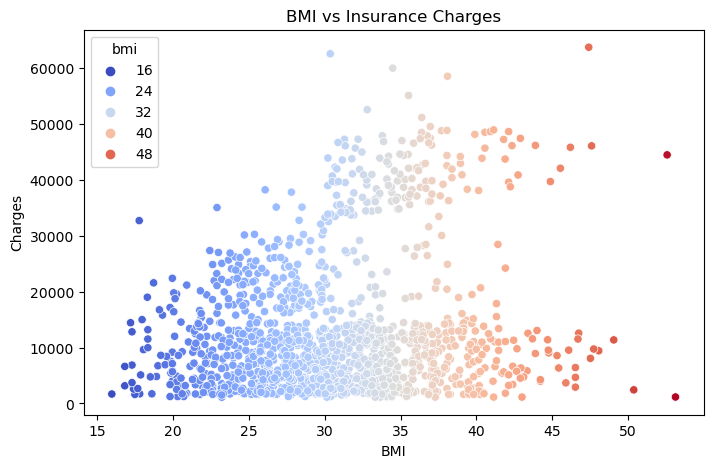

In [15]:
# BMI vs Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=df, hue='bmi', palette='coolwarm')
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

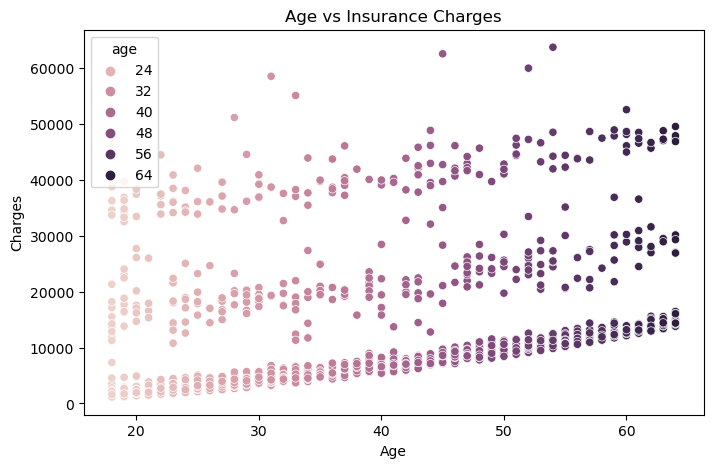

In [16]:
# Age vs Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df, hue='age')
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

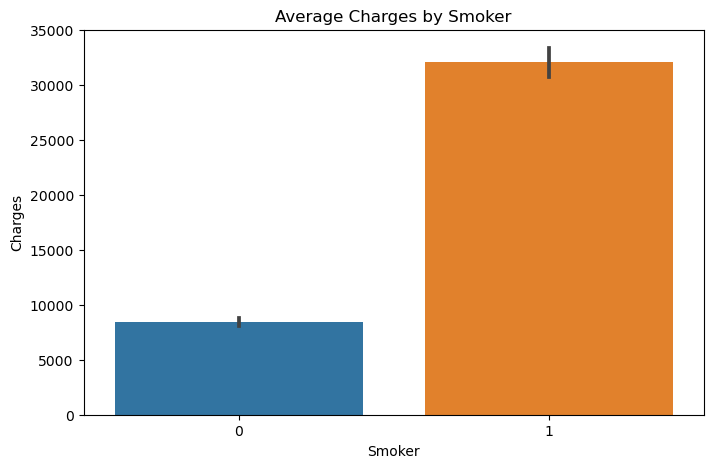

In [17]:
# Smoker vs Charges
plt.figure(figsize=(8, 5))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Average Charges by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

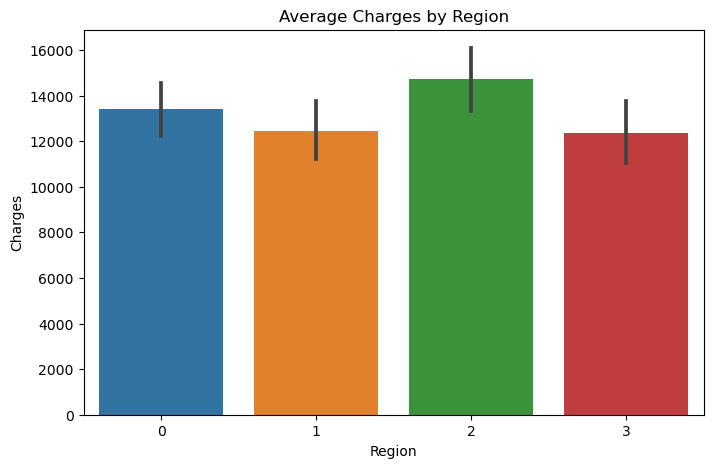

In [18]:
# Region vs Charges
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

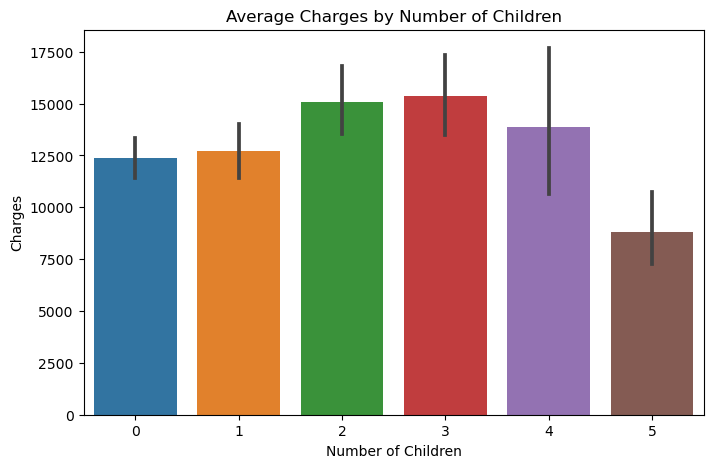

In [19]:
# Number of children vs Charges
plt.figure(figsize=(8, 5))
sns.barplot(x='children', y='charges', data=df)
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

# Define Features and Label

In [20]:
#features 
X = df.drop('charges',axis=1).to_numpy()
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [21]:
# label
y = df['charges'].to_numpy()
y


array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# Train Test Split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [23]:
print(X_train)


[[50.     1.    32.205  0.     0.     1.   ]
 [24.     0.    27.6    0.     0.     3.   ]
 [48.     1.    29.7    0.     0.     2.   ]
 ...
 [58.     1.    25.175  0.     0.     0.   ]
 [41.     1.    29.64   5.     0.     0.   ]
 [54.     0.    31.24   0.     0.     2.   ]]


In [24]:
print(X_test)


[[19.     0.    34.7    2.     1.     3.   ]
 [34.     0.    27.72   0.     0.     2.   ]
 [42.     0.    33.155  1.     0.     0.   ]
 ...
 [26.     1.    35.42   0.     0.     2.   ]
 [30.     1.    37.8    2.     1.     3.   ]
 [40.     1.    32.3    2.     0.     1.   ]]


In [25]:
print(y_train)

[ 8835.26495 18955.22017  7789.635   ... 11931.12525  9222.4026
 10338.9316 ]


In [26]:
print(y_test)

[36397.576     4415.1588    7639.41745   2304.0022    9563.029
 11454.0215    5012.471    12648.7034   13462.52     13974.45555
  4462.7218   11856.4115    4500.33925   2155.6815    5261.46945
 42560.4304    2632.992     8688.85885   6313.759    12638.195
  8116.26885   4906.40965   1137.4697    3554.203    10795.93733
  8944.1151    4894.7533    6393.60345  18328.2381    3279.86855
 39125.33225   2221.56445   1622.1885    1702.4553   44423.803
 21880.82      4074.4537   32734.1863    6113.23105   4463.2051
  4438.2634   10564.8845   33900.653     1632.03625   9101.798
 10436.096    13041.921     1137.011     8026.6666   33750.2918
 11946.6259   37165.1638   12347.172    12609.88702   9411.005
 23082.95533   1727.54      5245.2269   40932.4295    4561.1885
  7537.1639    9634.538     5148.5526   12363.547     4571.41305
  6282.235    14451.83515  33907.548     6360.9936    2483.736
 42112.2356   10422.91665   3877.30425   5028.1466    2730.10785
  2680.9493   25992.82104   8871.1517   

# Linear Regression

In [27]:
lr= LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
print("Linear Regression Mean Abosulte Error: ", mean_absolute_error(y_test, y_pred))

Linear Regression Mean Abosulte Error:  3639.7393442443304


In [31]:
print("Linear Regression Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
# Lower RMSE values indicate a better fit.

Linear Regression Root Mean Squared Error:  4937.110402025185


In [32]:
print("Linear Regression R-squared: ",r2_score(y_test,y_pred))


Linear Regression R-squared:  0.8140764981210225


In [33]:
print(y_test.min(), y_test.max(), y_test.mean())


1136.3994 48173.361 12145.665743988804


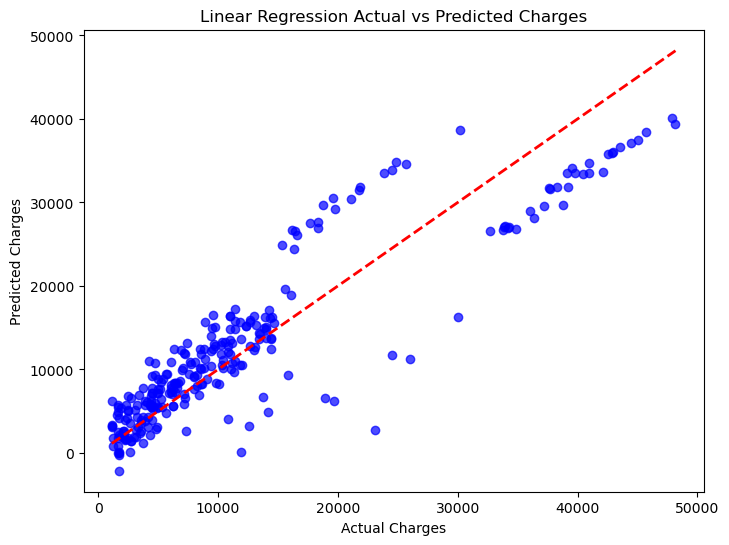

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) #creates that red diagonal line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression Actual vs Predicted Charges')
plt.show()

# Random Forest

In [35]:
RFR= RandomForestRegressor()
RFR.fit(X_train, y_train)


RandomForestRegressor()

In [36]:
y_pred = RFR.predict(X_test)

In [37]:
print("Random Forest Mean Abosulte Error: ", mean_absolute_error(y_test, y_pred))

Random Forest Mean Abosulte Error:  2305.767184533551


In [38]:
print("Random Forest Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
# Lower RMSE values indicate a better fit.

Random Forest Root Mean Squared Error:  3953.91382019726


In [39]:
print("Random Forest R-squared: ",r2_score(y_test,y_pred))
# 88.67%  
# closer R² is to 1, the better your model is at predicting the data.

Random Forest R-squared:  0.880754222024359


In [40]:
print(y_test.min(), y_test.max(), y_test.mean())


1136.3994 48173.361 12145.665743988804


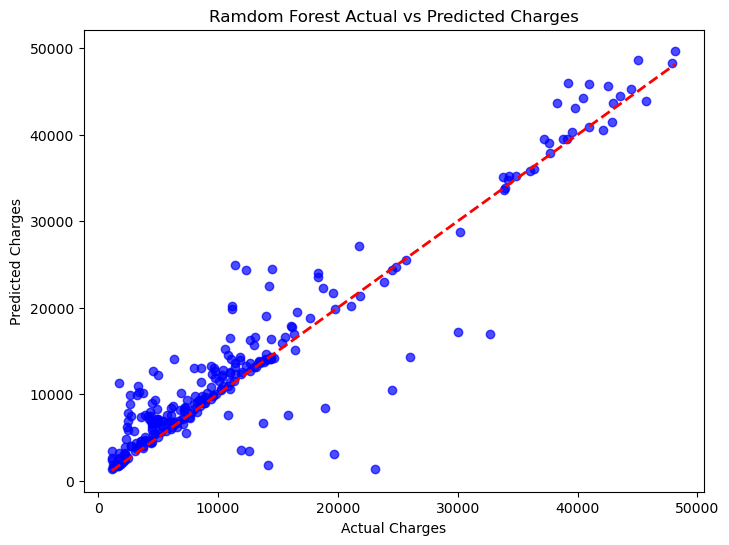

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) #creates that red diagonal line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Ramdom Forest Actual vs Predicted Charges')
plt.show()

# KNearestNeighbors

In [42]:
KNN = KNeighborsRegressor(n_neighbors=3)


In [43]:
KNN.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [44]:
y_pred = KNN.predict(X_test)


In [45]:
print("KNN Mean Abosulte Error: ", mean_absolute_error(y_test, y_pred))

KNN Mean Abosulte Error:  7284.240776856965


In [46]:
print("KNN Root Mean Square Error: ", mean_squared_error(y_test,y_pred))
# Lower RMSE values indicate a better fit.

KNN Root Mean Square Error:  120367442.13913333


In [47]:
print("KNN R-squared: ",r2_score(y_test,y_pred))

KNN R-squared:  0.08188381234647135


In [48]:
print(y_test.min(), y_test.max(), y_test.mean())


1136.3994 48173.361 12145.665743988804


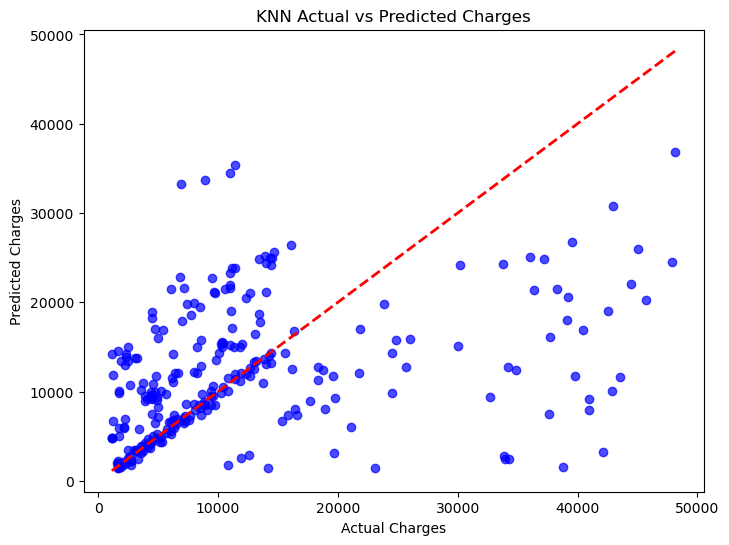

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) #creates that red diagonal line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('KNN Actual vs Predicted Charges')
plt.show()

In [50]:
new_prediction = {'age':61,'sex':0,'bmi':29.070,'children':0,'smoker':1,'region':1}
sample_df = pd.DataFrame([new_prediction])
pred = RFR.predict(sample_df)
print(f"Predicted Insurance Charge: {pred[0]}")


Predicted Insurance Charge: 28825.46068049999


C:\Users\Aser\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
